# 탐색트리 
탐색을 위한 트리기반의 자료구조

<이진 탐색트리>

* 효율적인 탐색을 위한 이진트리 기반의 자료구조
* 삽입, 삭제, 탐색: O(logn)
* 모든 노드는 유일한 키
* 왼쪽 서브트리의 키들은 루트의 키보다 작다.
* 오른쪽 서브트리의 키들은 루트의 키보다 크다.
* 왼쪽과 오른쪽 서브트리도 이진탐색트리다.

값을 이용한 탐색은 모든 노드를 검색해야함.

가장 큰 노드는 맨 오른쪽 / 가장 작은 노드는 맨 왼쪽

(탐색연산)

* key 값 이용 탐색 : 이진 탐색 특성으로 정렬된 트리를 활용해서 key의 위치를 찾아 내려가는 것. 시간 복잡도 =O(logn)
* value 값 이용 탐색 : 모든 값을 확인하는 순회 방법을 사용하면서 찾는 것. 시간 복잡도 =O(n)

(삭제 연산)

탐색으로 parent와 삭제할 node 위치를 확인후, parent가 어딜 가리킬지 정하여 삭제한다.

1. 삭제하려는 노드가 단말 노드일 경우
2. 삭제하려는 노드가 하나의 왼쪽이나 오른쪽 서브트리중 하나만 가지고 있는 경우
3. 삭제하려는 노드가 두개의 서브 트리 모두 가지고 있는 경우

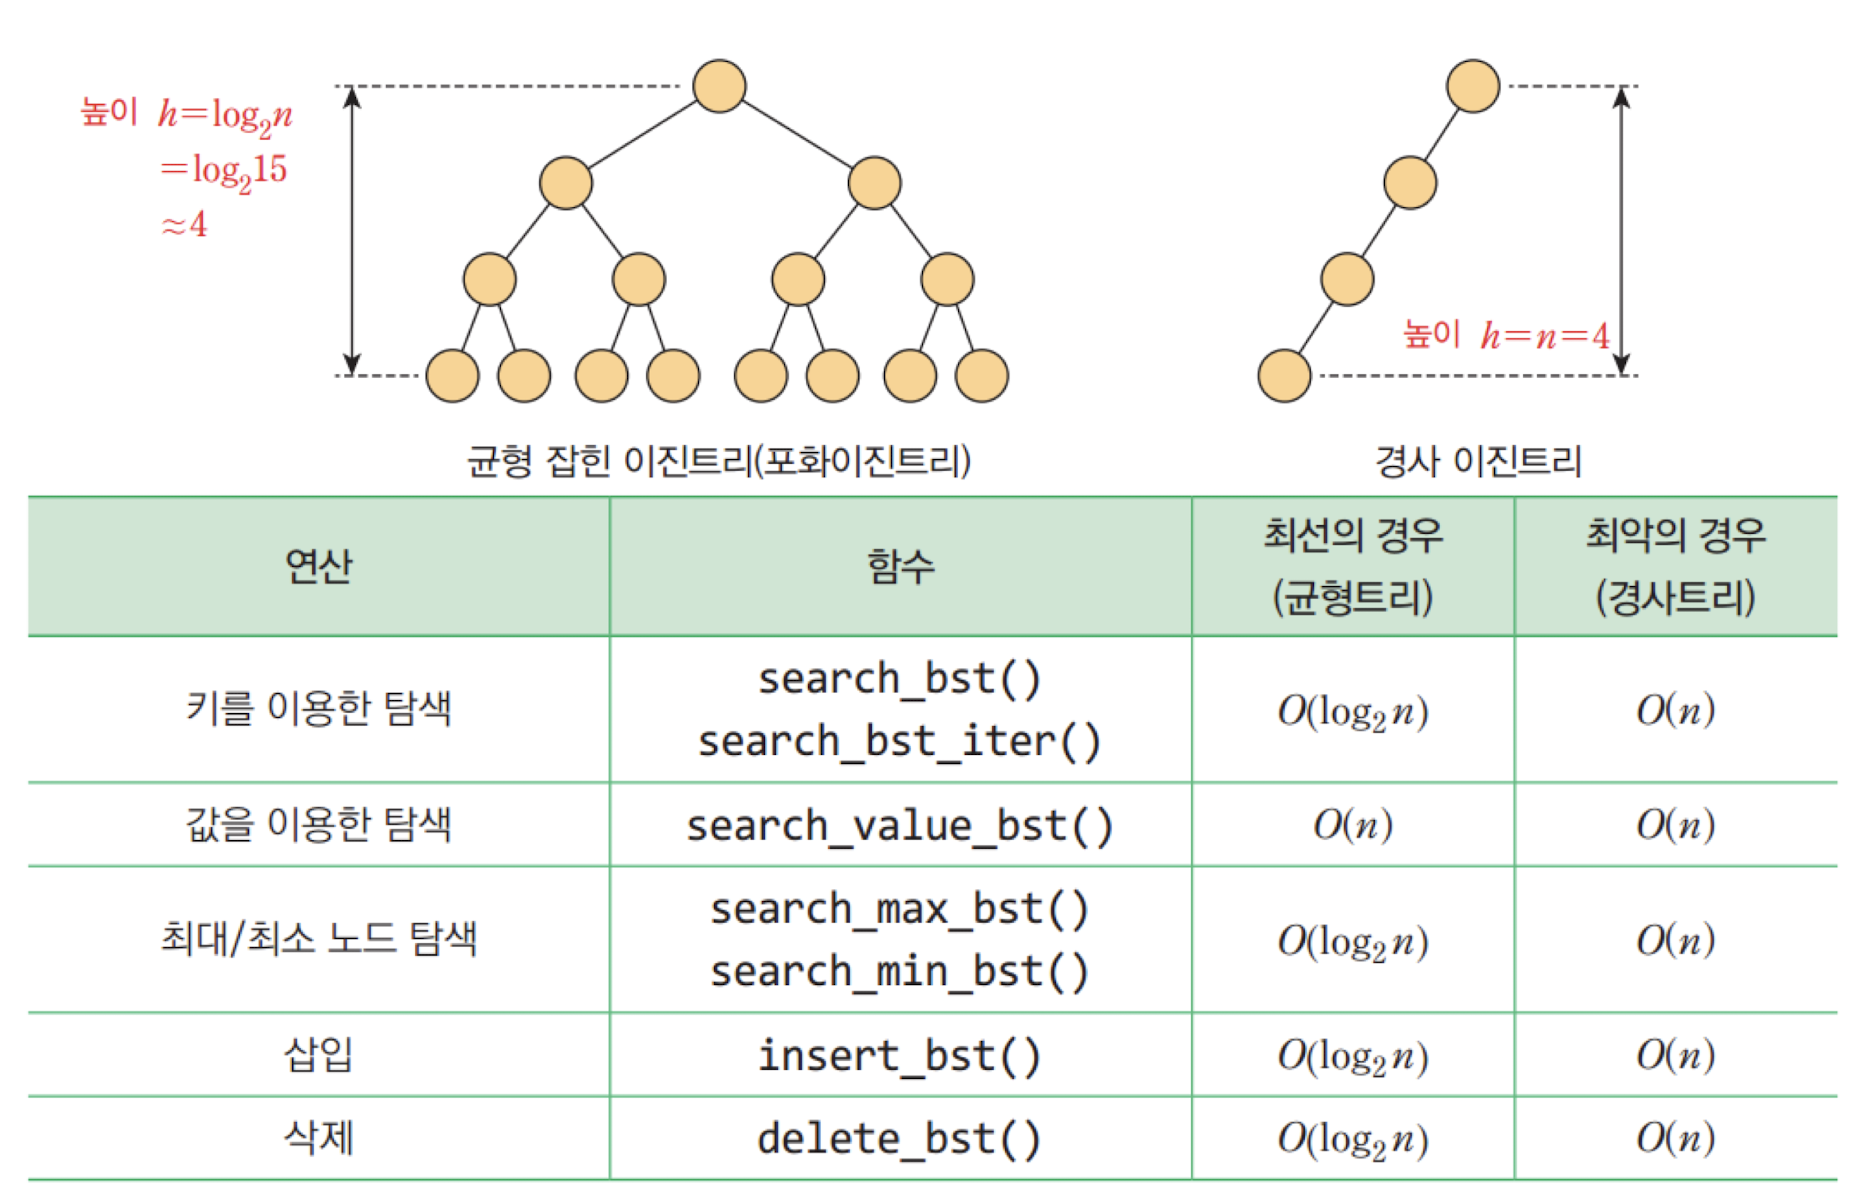

In [16]:
#p163 circular queue
#p166 code

MAX_QUEUE = 10
class CircularQueue:
    def __init__(self):
        self.front = 0 #최근에 삭제된 자리(값이 0)
        self.rear = 0  #최근에 추가된 자리(값이 최근 추가된 값)
        self.items = [None] *MAX_QUEUE
    
    def isEmpty(self):
        return self.front == self.rear
    
    def isFull(self):
        return self.front == (self.rear +1) % MAX_QUEUE #
    
    def clear(self):
        self.front = self.rear
    
    def enqueue(self, item):
        if not self.isFull(): #계속 추가하다가 다 채워지면, 아래 코드 실행하지 않는다.
            self.rear = (self.rear+1) % MAX_QUEUE #한칸 앞으로 가는 코드
            self.items[self.rear] = item #한칸 앞으로 가진 rear위치에 item 값으로 바꾼다.
            # print(self.items)
    def dequeue(self):
        # print(self.items)
        if not self.isEmpty(): #계속 삭제하다가 다 사라지면, 아래 코드 실행하지 않는다.
            self.front = (self.front+1) %MAX_QUEUE

            return self.items[self.front]
    
    def peek(self):
        if not self.isEmpty():
            return self.items[(self.front+1)%MAX_QUEUE]
    
    def size(self):
        return (self.rear - self.front +MAX_QUEUE) % MAX_QUEUE
    
    def display(self):
        out = []
        if self.front < self.rear:
            out = self.items[self.front+1 : self.rear+1] #front는 빈칸 때문에 +1 , rear+!은 리스트 인덱스 때문에
        else:
            out = self.items[self.front+1:MAX_QUEUE]+self.items[0:self.rear+1] #front에 1을 더하는 것은 front는 방금삭제된 자리인 공백이기 때문, rear에 1을 더한것은 list의 인덱싱 특성때문에
        print('f:%s,r=%d, ==> '%(self.front,self.rear),out)
        

In [17]:
class BSTNode:
    def __init__(self,key,value):
        self.key = key
        self.value = value
        self.left = None
        self.right = None
        
def search_bst(n,key): # 순환 함수
    if n != None:
        print(n.key,end =' ')
    if n ==None:
        return None
    elif key == n.key:
        return n
    elif key < n.key:
        return search_bst(n.left,key)
    else:
        return search_bst(n.right,key)
    
def search_bst_iter(n,key): # 반복 함수
    while n != None:
        if key == n.key:
            return n
        elif key < n.key:
            n = n.left
        else:
            n = n.right
    return None

def search_max_bst(n): #while문이 끝났을 때의 node를 찾는 것.max는 오른쪽에 있으니까 right로 이동!
    while n != None and n.right != None:
        n = n.right
    return n

def search_min_bst(n): #while문이 끝났을 때의 node를 찾는 것.min은 왼쪽에 있으니까 left로 이동!
    while n != None and n.left != None:
        n = n.left
    return n

def insert_bst(r,n): 
    if n.key < r.key: #왼쪽
        if r.left is None:
            r.left = n
            return True
        else:
            return insert_bst(r.left,n)
    elif n.key > r.key: #오른쪽
        if r.right is None:
            r.right = n
            return True
        else:
            return insert_bst(r.right,n)
    else:
        return False

def delete_bst_case1(parent,node,root): #단말 노드 삭제
    if parent is None: #삭제할 노드가 단말노드면
        root = None #
    else:
        if parent.left == node:
            parent.left = None
        else:
            parent.right = None
    return root

def delete_bst_case2(parent,node,root):
    if node.left is not None:
        child = node.left
    else:
        child = node.right

    if node == root:
        root = child
    else:
        if node is parent.left:
            parent.left = child
        else:
            parent.right = child
    return root

def delete_bst_case3(parent,node,root):
    succp = node
    succ = node.right
    while(succ.left != None):
        succp = succ
        succ = succ.left

    if (succp.left == succ): #left노드가 후계자 노드면?
        succp.left = succ.right
    else: # left 노드가 없는 후계자 노드였을 경우.
        succp.right = succ.right
    node.key = succ.key
    node.value = succ.value
    node = succ

    return root

def delete_bst(root,key):
    if root == None: return None

    parent = None
    node = root
    while node != None and node.key != key:
        parent = node
        if key < node.key: node = node.left
        else: node = node.right

    if node == None: return None
    if node.left == None and node.right == None:
        root = delete_bst_case1(parent,node,root)
    elif node.left == None or node.right == None:
        root = delete_bst_case2(parent,node,root)
    else:
        root = delete_bst_case3(parent,node,root)
    return root
        

In [18]:
def inorder(n):
    if n is not None:
        inorder(n.left)
        print(n.key,end = ' ')
        inorder(n.right)
        
def levelorder(root):
    queue = CircularQueue()
    queue.enqueue(root)
    while not queue.isEmpty():
        n = queue.dequeue()
        if n is not None:
            print(n.key,end = ' ')
            queue.enqueue(n.left)
            queue.enqueue(n.right)

In [19]:
class BSTMap():
    def __init__(self):
        self.root = None
    
    def isEmpty(self): return self.root == None
    def clear(self): self.root = None
    def size(self): return count_node(self.root)
    def search(self, key): return search_bst(self.root,key)
    def findMax(self): return search_max_bst(self.root)
    def findMin(self): return search_min_bst(self.root)

    def insert(self,key,value=None):
        n = BSTNode(key,value)
        if self.isEmpty():
            self.root = n
        else:
            insert_bst(self.root,n)
            
    def delete(self,key):
        self.root = delete_bst(self.root,key)
        
    def display(self,msg = 'BSTMap :'):
        print(msg,end='')
        levelorder(self.root)
        print()

In [22]:
map = BSTMap()
# data =[35,18,7,26,12,3,68,22,30,99]
data =[11,6,8,19,4,10,5,17,43,49,31]

print('[삽입 연산] :',data)
for key in data:
    map.insert(key)
map.display('[중위 순회] :')

if map.search(26) !=None: print('탐색 26 : 성공')
else: print('탐색 26 : 실패')

if map.search(25) != None: print('탐색 25 : 성공')
else: print('탐색 25 : 실패')

map.delete(3)
map.display(' 3  삭제 :')
map.delete(68)
map.display(' 68 삭제 :')
map.delete(18)
map.display(' 18 삭제 :')
map.delete(35)
map.display(' 35 삭제 :')


[삽입 연산] : [11, 6, 8, 19, 4, 10, 5, 17, 43, 49, 31]
[중위 순회] :11 6 19 4 8 17 43 5 10 31 49 
11 19 43 31 탐색 26 : 실패
11 19 43 31 탐색 25 : 실패
 3  삭제 :
 68 삭제 :
 18 삭제 :
 35 삭제 :


In [21]:
map = BSTMap()
data =[8,3,9,1,5,12,4,11]

print('[삽입 연산] :',data)
for key in data:
    map.insert(key)
# map.display('[중위 순회] :')

if map.search(4) !=None: print('\n탐색 4 : 성공')
else: print('\n탐색 4 : 실패')

map.delete(8)
map.display(' 8 삭제 :')

[삽입 연산] : [8, 3, 9, 1, 5, 12, 4, 11]
8 3 5 4 
탐색 4 : 성공
 8 삭제 :9 3 12 1 5 11 4 


# AVL
: 모든 노드에서 왼쪽 서브타리와 오른쪽 서브트리의 높이 차가 1을 넘지 않는 이진 탐색트리다. 즉, 모든 노드의 균형 인수는 0이나 +=1이 되어야한다.

[균형인수] : 왼쪽서브트리 높이 - 오른쪽 서브트리 높이

-평균, 최선,, 최악 시간복잡도 : O(logn)보장

(탐색연산) : 이진탐색트리와 동일

-삽입과 삭제 시 균형 상태가 깨질 수 있음.

(삽입 연산) : 삽입 위치에서 루트까지의 경로에 있는 조상 노드들의 균형 인수에 영향을 미침

-삽입후에 불균형 -> 다시 재 균형
- LL : 시계방향(left node를 건들여)
- LR : RR -> LL
- RR : 반시계 방향(right node를 건들여)
- RL : LL -> RR


In [27]:
#p163 circular queue
#p166 code

MAX_QUEUE = 10
class CircularQueue:
    def __init__(self):
        self.front = 0 #최근에 삭제된 자리(값이 0)
        self.rear = 0  #최근에 추가된 자리(값이 최근 추가된 값)
        self.items = [None] *MAX_QUEUE
    
    def isEmpty(self):
        return self.front == self.rear
    
    def isFull(self):
        return self.front == (self.rear +1) % MAX_QUEUE #
    
    def clear(self):
        self.front = self.rear
    
    def enqueue(self, item):
        if not self.isFull(): #계속 추가하다가 다 채워지면, 아래 코드 실행하지 않는다.
            self.rear = (self.rear+1) % MAX_QUEUE #한칸 앞으로 가는 코드
            self.items[self.rear] = item #한칸 앞으로 가진 rear위치에 item 값으로 바꾼다.
    def dequeue(self):
        if not self.isEmpty(): #계속 삭제하다가 다 사라지면, 아래 코드 실행하지 않는다.
            self.front = (self.front+1) %MAX_QUEUE

            return self.items[self.front]
    
    def peek(self):
        if not self.isEmpty():
            return self.items[(self.front+1)%MAX_QUEUE]
    
    def size(self):
        return (self.rear - self.front +MAX_QUEUE) % MAX_QUEUE
    
    def display(self):
        out = []
        if self.front < self.rear:
            out = self.items[self.front+1 : self.rear+1] #front는 빈칸 때문에 +1 , rear+!은 리스트 인덱스 때문에
        else:
            out = self.items[self.front+1:MAX_QUEUE]+self.items[0:self.rear+1] #front에 1을 더하는 것은 front는 방금삭제된 자리인 공백이기 때문, rear에 1을 더한것은 list의 인덱싱 특성때문에
        print('f:%s,r=%d, ==> '%(self.front,self.rear),out)
        

In [28]:
def levelorder(root):
    queue = CircularQueue()
    queue.enqueue(root)
    while not queue.isEmpty():
        n = queue.dequeue()
        if n is not None:
            print(n.key,end = ' ')
            queue.enqueue(n.left)
            queue.enqueue(n.right)

def calc_height(n):
    if n is None:
        return 0
    global hLeft
    global hRight
    hLeft = calc_height(n.left)
    hRight = calc_height(n.right)

    if (hLeft > hRight):
        return hLeft+1
    else:
        return hRight+1
def calc_height_diff(n):
    left = calc_height(n.left)
    right = calc_height(n.right)
    return left - right

In [29]:
def rotateLL(A):
    print('LL')
    B = A.left
    A.left = B.right
    B.right = A
    return B

def rotateRR(A):
    print('RR')
    B = A.right
    A.right = B.left
    B.left = A
    return B

def rotateRL(A):
    print('RL')
    B = A.right
    A.right = rotateLL(B)
    return rotateRR(A)

def rotateLR(A):
    print('LR')
    B = A.left
    A.left = rotateRR(B)
    return rotateLL(A)

def reBalance (parent):
    hDiff = calc_height_diff(parent)    # parent의 왼쪽과 오른쪽 서브트리 높이 차를 # 반환하는 함수. parent가 None이면 0을 반환
    if hDiff > 1 :
        if calc_height_diff(parent.left) > 0 :
            parent = rotateLL(parent)
        else:
            parent = rotateLR(parent)
    elif hDiff < -1 :
        if calc_height_diff(parent.right) < 0 :
            parent = rotateRR(parent)
        else:
            parent = rotateRL(parent)
    return parent

def insert_avl(parent, node):
    if node.key < parent.key:
        if parent.left != None:
            parent.left = insert_avl(parent.left, node)
        else:
            parent.left = node
        return reBalance(parent)
    
    elif node.key > parent.key:
        if parent.right != None :
            parent.right = insert_avl(parent.right, node)
        else:
            parent.right = node
        return reBalance(parent)
    else:
        print("중복된 키 에러")
        


In [30]:
def count_node(n):
    if n is None:
        return 0
    else:
        return 1+count_node(n.left)+count_node(n.right)
    
def count_leaf(n):
    if n is None:
        return 0
    elif n.left is None and n.right is None:
        return 1
    else:
        return count_leaf(n.left) + count_leaf(n.right)

In [31]:
class AVLMap(BSTMap):
    def __init__(self):
        super().__init__()
    
    def insert(self,key,value=None):
        n = BSTNode(key,value)
        if self.isEmpty():
            self.root = n
        else:
            self.root = insert_avl(self.root,n)
        
    def display(self,msg = 'AVLMap :'):
        print(msg,end = '')
        levelorder(self.root)
        print()
    

In [32]:
#node = [7,8,9,2,1,5,3,6,4]
node = [1,2,3,4,5,6,7,8,9]
map = AVLMap()

for i in node:
    map.insert(i)
    map.display("AVL(%d): "%i)
    
print('노드의 개수 =%d'%count_node(map.root))
print('단말의 개수 =%d'%count_node(map.root))
print('트리의 개수 =',calc_height(map.root))
    

AVL(1): 1 
AVL(2): 1 2 
RR
AVL(3): 2 1 3 
AVL(4): 2 1 3 4 
RR
AVL(5): 2 1 4 3 5 
RR
AVL(6): 4 2 5 1 3 6 
RR
AVL(7): 4 2 6 1 3 5 7 
AVL(8): 4 2 6 1 3 5 7 8 
RR
AVL(9): 4 2 6 1 3 5 8 7 9 
노드의 개수 =9
단말의 개수 =9
트리의 개수 = 4
